Problem 1

In [1]:
import os
import numpy as np
from PIL import Image
from IPython.display import display, clear_output
import time
import matplotlib.pyplot as plt


# Define the directory containing the frames
directory = "/source"

# Get the list of frame files
frame_files = sorted([f for f in os.listdir(directory) if f.endswith('.png')])

# Function to load and convert an image to grayscale
def load_and_convert_image(file_path):
    img = Image.open(file_path).convert('L')  # Convert to grayscale
    return np.array(img) / 255.0  # Normalize to [0, 1]

# Load frames into a list
frames = [load_and_convert_image(os.path.join(directory, frame)) for frame in frame_files]

# Display frames as animation
for i, frame in enumerate(frames):
    clear_output(wait=True)
    plt.imshow(frame, cmap='gray')
    plt.title(f"Frame {i + 1}/{len(frame_files)}")
    plt.show()
    time.sleep(0.005)  # Adjust the delay as needed


FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'C:/Users/david/OneDrive/Skrivebord/DTU Courses/4th Semester/02526 Mathematical Modelling/Project1/toyProblem_F22/toyProblem_F22/'

Problem 2.1

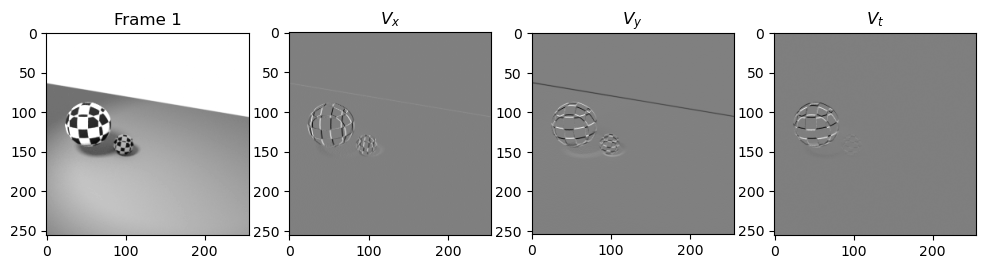

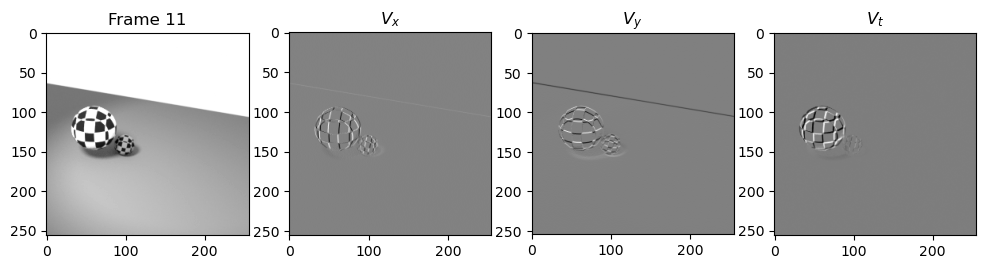

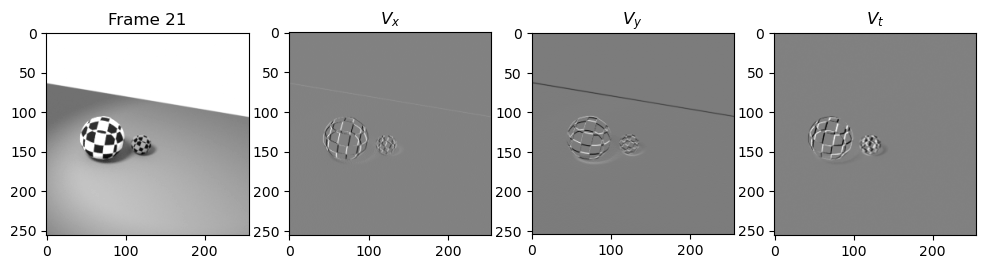

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory containing the frames
directory = "C:/Users/david/OneDrive/Skrivebord/DTU Courses/4th Semester/02526 Mathematical Modelling/Project1/toyProblem_F22/toyProblem_F22/"

# Get the list of frame files
frame_files = sorted([f for f in os.listdir(directory) if f.endswith('.png')])

# Function to load and convert an image to grayscale
def load_and_convert_image(file_path):
    img = Image.open(file_path).convert('L')  # Convert to grayscale
    return np.array(img) / 255.0  # Normalize to [0, 1]

# Load frames into a list
frames = [load_and_convert_image(os.path.join(directory, frame)) for frame in frame_files]

# Calculate Vx, Vy, Vt
Vx_list, Vy_list, Vt_list = [], [], []

for i in range(1, len(frames)):
    Vx = frames[i][:, 1:] - frames[i][:, :-1]
    Vy = frames[i][1:, :] - frames[i][:-1, :]
    Vt = frames[i] - frames[i - 1]

    Vx_list.append(Vx)
    Vy_list.append(Vy)
    Vt_list.append(Vt)

# Display some selected frames along with Vx, Vy, and Vt
selected_frames = [0, 10, 20]  # Adjust the frames you want to display

for frame_idx in selected_frames:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(frames[frame_idx], cmap='gray')
    plt.title(f"Frame {frame_idx + 1}")

    plt.subplot(1, 4, 2)
    plt.imshow(Vx_list[frame_idx], cmap='gray')
    plt.title(r"$V_x$")

    plt.subplot(1, 4, 3)
    plt.imshow(Vy_list[frame_idx], cmap='gray')
    plt.title(r"$V_y$")

    plt.subplot(1, 4, 4)
    plt.imshow(Vt_list[frame_idx], cmap='gray')
    plt.title(r"$V_t$")

    plt.show()


Problem 2.2

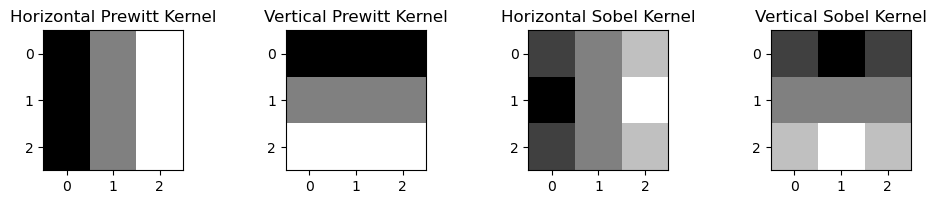

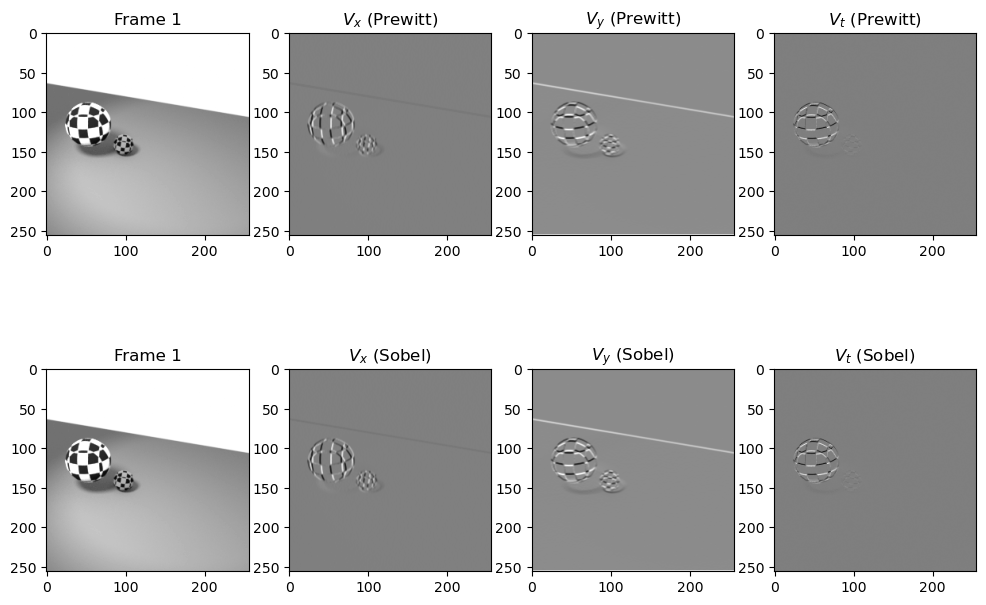

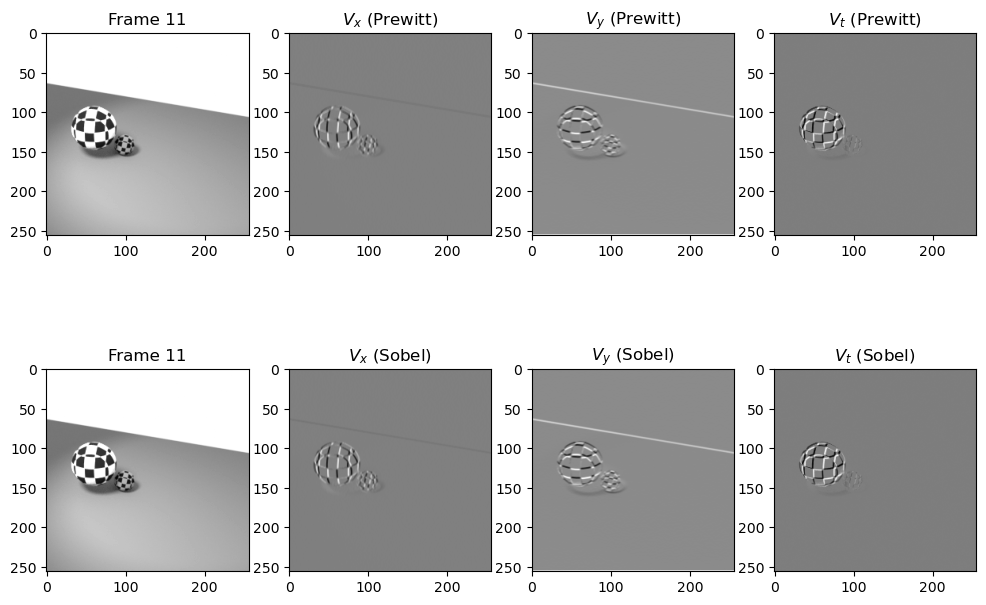

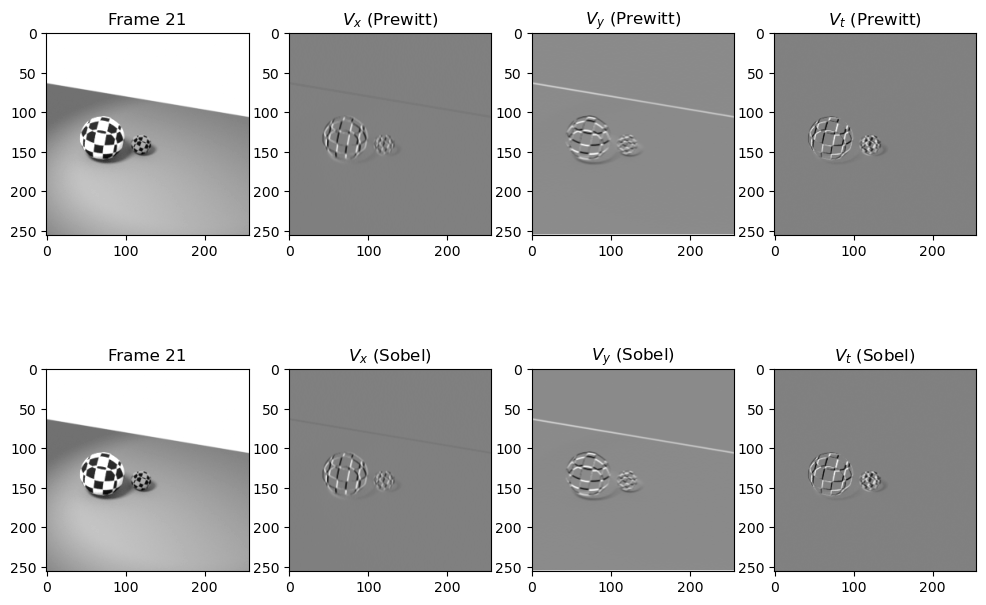

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Generate Prewitt and Sobel kernels for horizontal and vertical gradients
def generate_prewitt_kernel(horizontal=True):
    if horizontal:
        return np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    else:
        return np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

def generate_sobel_kernel(horizontal=True):
    if horizontal:
        return np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    else:
        return np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Function to calculate Vx, Vy, Vt using image filtering
def calculate_gradients(frames, kernel):
    Vx = np.array([convolve(frame, kernel, mode='constant', cval=0.0) for frame in frames])
    Vy = np.array([convolve(frame, kernel.T, mode='constant', cval=0.0) for frame in frames])
    Vt = np.diff(frames, axis=0)

    return Vx, Vy, Vt

# Load frames into a list (assuming frames is already loaded as in the previous problem)
# frames = [load_and_convert_image(os.path.join(directory, frame)) for frame in frame_files]

# Choose either Prewitt or Sobel kernel for horizontal and vertical gradients
horizontal_prewitt_kernel = generate_prewitt_kernel(horizontal=True)
vertical_prewitt_kernel = generate_prewitt_kernel(horizontal=False)

horizontal_sobel_kernel = generate_sobel_kernel(horizontal=True)
vertical_sobel_kernel = generate_sobel_kernel(horizontal=False)

# Calculate Vx, Vy, Vt using Prewitt kernels
Vx_prewitt, Vy_prewitt, Vt_prewitt = calculate_gradients(frames, horizontal_prewitt_kernel)
Vx_sobel, Vy_sobel, Vt_sobel = calculate_gradients(frames, horizontal_sobel_kernel)

# Display the kernels
plt.figure(figsize=(12, 4))

plt.subplot(2, 4, 1)
plt.imshow(horizontal_prewitt_kernel, cmap='gray')
plt.title('Horizontal Prewitt Kernel')

plt.subplot(2, 4, 2)
plt.imshow(vertical_prewitt_kernel, cmap='gray')
plt.title('Vertical Prewitt Kernel')

plt.subplot(2, 4, 3)
plt.imshow(horizontal_sobel_kernel, cmap='gray')
plt.title('Horizontal Sobel Kernel')

plt.subplot(2, 4, 4)
plt.imshow(vertical_sobel_kernel, cmap='gray')
plt.title('Vertical Sobel Kernel')

# Display the calculated gradients
selected_frames = [0, 10, 20]  # Adjust the frames you want to display

for frame_idx in selected_frames:
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 4, 1)
    plt.imshow(frames[frame_idx], cmap='gray')
    plt.title(f"Frame {frame_idx + 1}")

    plt.subplot(2, 4, 2)
    plt.imshow(Vx_prewitt[frame_idx], cmap='gray')
    plt.title(r"$V_x$ (Prewitt)")

    plt.subplot(2, 4, 3)
    plt.imshow(Vy_prewitt[frame_idx], cmap='gray')
    plt.title(r"$V_y$ (Prewitt)")

    plt.subplot(2, 4, 4)
    plt.imshow(Vt_prewitt[frame_idx], cmap='gray')
    plt.title(r"$V_t$ (Prewitt)")

    plt.subplot(2, 4, 5)
    plt.imshow(frames[frame_idx], cmap='gray')
    plt.title(f"Frame {frame_idx + 1}")

    plt.subplot(2, 4, 6)
    plt.imshow(Vx_sobel[frame_idx], cmap='gray')
    plt.title(r"$V_x$ (Sobel)")

    plt.subplot(2, 4, 7)
    plt.imshow(Vy_sobel[frame_idx], cmap='gray')
    plt.title(r"$V_y$ (Sobel)")

    plt.subplot(2, 4, 8)
    plt.imshow(Vt_sobel[frame_idx], cmap='gray')
    plt.title(r"$V_t$ (Sobel)")

    plt.show()


problem 2.3

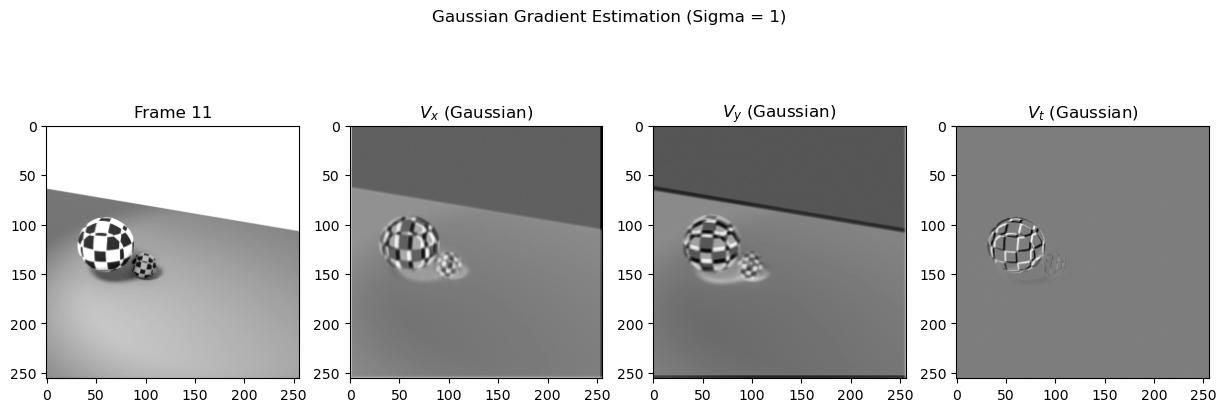

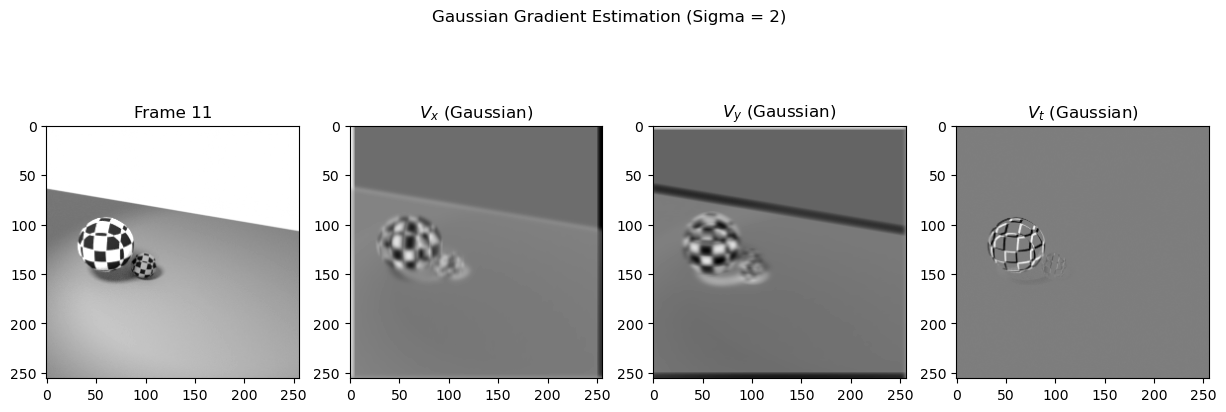

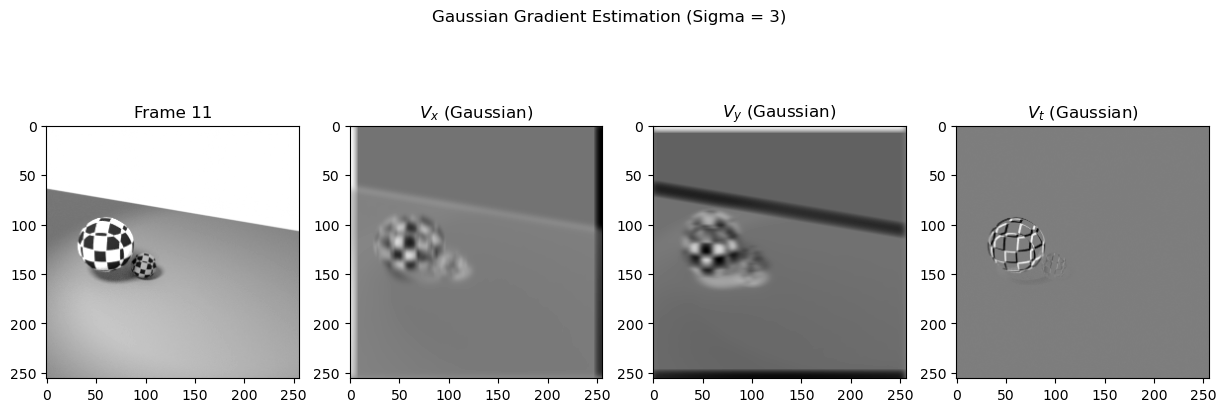

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Function to generate 1D Gaussian kernel
def generate_gaussian_kernel(sigma, size):
    x = np.arange(-size // 2 + 1, size // 2 + 1)
    kernel = np.exp(-x**2 / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Function to generate 2D Gaussian kernel
def generate_2d_gaussian_kernel(sigma, size):
    x = generate_gaussian_kernel(sigma, size)
    return np.outer(x, x)

# Function to generate 3D Gaussian kernel
def generate_3d_gaussian_kernel(sigma, size):
    x = generate_gaussian_kernel(sigma, size)
    return np.outer(x, np.outer(x, x))

# Function to calculate gradients using Gaussian derivatives
def calculate_gaussian_gradients(frames, sigma):
    kernel_size = int(6 * sigma)  # Choose kernel size based on sigma
    gaussian_kernel = generate_gaussian_kernel(sigma, kernel_size)
    gaussian_x = -np.arange(-kernel_size // 2 + 1, kernel_size // 2 + 1) / sigma * gaussian_kernel[:, np.newaxis]

    Vx = np.array([convolve(frame, gaussian_x, mode='constant', cval=0.0) for frame in frames])
    Vy = np.array([convolve(frame, gaussian_x.T, mode='constant', cval=0.0) for frame in frames])
    Vt = np.diff(frames, axis=0)

    return Vx, Vy, Vt

# Load frames into a list (assuming frames is already loaded as in the previous problems)
# frames = [load_and_convert_image(os.path.join(directory, frame)) for frame in frame_files]

# Vary sigma to observe the effect on gradient estimation
sigma_values = [1, 2, 3]

for sigma in sigma_values:
    Vx_gaussian, Vy_gaussian, Vt_gaussian = calculate_gaussian_gradients(frames, sigma)

    # Display results for a selected frame
    frame_idx = 10  # Adjust the frame index as needed

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(frames[frame_idx], cmap='gray')
    plt.title(f"Frame {frame_idx + 1}")

    plt.subplot(1, 4, 2)
    plt.imshow(Vx_gaussian[frame_idx], cmap='gray')
    plt.title(r"$V_x$ (Gaussian)")

    plt.subplot(1, 4, 3)
    plt.imshow(Vy_gaussian[frame_idx], cmap='gray')
    plt.title(r"$V_y$ (Gaussian)")

    plt.subplot(1, 4, 4)
    plt.imshow(Vt_gaussian[frame_idx], cmap='gray')
    plt.title(r"$V_t$ (Gaussian)")

    plt.suptitle(f"Gaussian Gradient Estimation (Sigma = {sigma})")
    plt.show()
